In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#we don't need this, got an error from it: from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

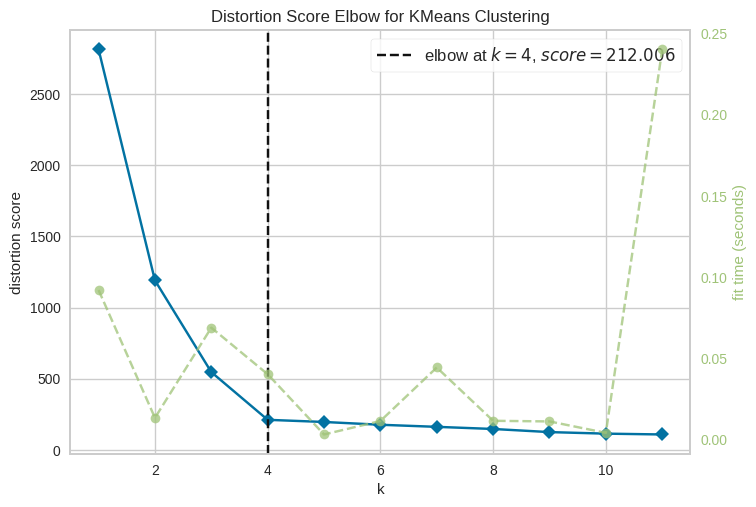

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
# TODO determine the best k for k-means

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#The best value of k was determined to be 4(elbow)

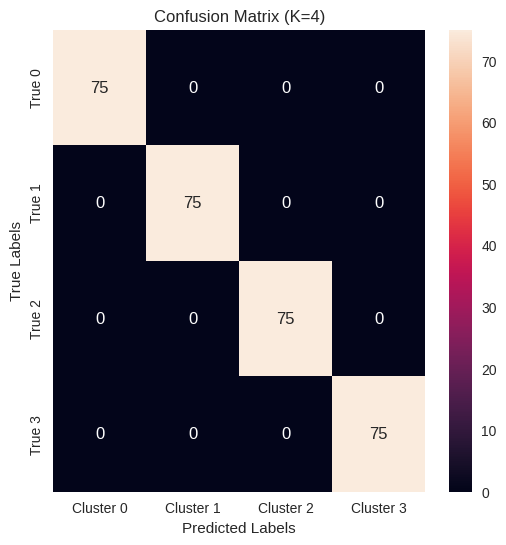

1.0

In [55]:
# TODO calculate accuracy for best K & Draw a Confusion Matrix
import seaborn as sns
import numpy as np
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt

model = KMeans(n_clusters=4, n_init='auto')
y_pred = model.fit_predict(X, y_true)

kmeans_labels = y_pred
true_labels = np.array(y_true)

mapping = {}
for kmeans_label in np.unique(kmeans_labels):
    most_frequent_true_label = mode(true_labels[kmeans_labels == kmeans_label]).mode
    mapping[kmeans_label] = most_frequent_true_label

corrected_kmeans_labels = np.array([mapping[label] for label in kmeans_labels])

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=True,
            xticklabels=[f'Cluster {i}' for i in range(4)],
            yticklabels=[f'True {i}' for i in range(np.max(true_labels) + 1)])
plt.title(f'Confusion Matrix (K=4)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
correct = np.sum(np.max(cm, axis=1))
purity = correct / np.sum(cm)

purity

# Purity of 1 indicates that the predictions are perfect.